In [1]:
'''
VMP 2022-03-26: 
These figures / numbers are reported in SI
'''

'\nVMP 2022-03-26: \nThese figures / numbers are reported in SI\n'

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from matplotlib.ticker import ScalarFormatter

In [3]:
# markers gender dct
mks_g_dct = {'Female': 'o',
             'Male': '^'} 

# colors gender dct
clrs_g_dct = {'Female': '#fc8d62',
              'Male': '#66c2a5'}

# colors gender lst 
clrs_g_lst = ['#fc8d62', '#66c2a5']

# other setup: 
ms=2  #marker size

# for plots with three panels # 
# other setup: 
sns.set(style='ticks', font_scale=1.3, font='Arial')  #overall style for figs (has to be a bit smaller than productivity)

# for plots with three panels # 
figsize=(4.5*3,3.2*3)
dpi = 300

style = 'SS'

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Arial')

#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Arial', 'sans-serif']


In [4]:
path = '/home/vicp/data/mag2021_12_06/datacuration/'

# Papers

In [5]:
papers_NoFilter = pd.read_csv(f'{path}papers_NoFilter.csv')
papers_25 = pd.read_csv(f'{path}papers_25.csv')
papers_RefCite = pd.read_csv(f'{path}papers_RefCite.csv')
papers_All = pd.read_csv(f'{path}papers_All.csv')
papers_Repo = pd.read_csv(f'{path}papers_Repo.csv')

In [6]:
# first fix years

In [7]:
def subset_years(df, year_low, year_high): 
    df = df[(df["Year"] <= year_high) & (df["Year"] >= year_low)]
    df = df.drop_duplicates()
    return df

In [8]:
papers_NoFilter = subset_years(papers_NoFilter, 2010, 2021)
papers_25 = subset_years(papers_25, 2010, 2021)
papers_RefCite = subset_years(papers_RefCite, 2010, 2021)
papers_All = subset_years(papers_All, 2010, 2021)
papers_Repo = subset_years(papers_Repo, 2010, 2021)

In [9]:
# check overall volume

In [10]:
divisor = 1000000
NoFilterSum = round(papers_NoFilter["count"].sum()/divisor, 2)
Filter25Sum = round(papers_25["count"].sum()/divisor, 2)
RefCiteSum = round(papers_RefCite["count"].sum()/divisor, 2)
FilterAllSum = round(papers_All["count"].sum()/divisor, 2)
RepoSum = round(papers_Repo["count"].sum()/divisor, 2)
print(f"NoFilter: {NoFilterSum}M \nFilter25: {Filter25Sum}M \nRefCite: {RefCiteSum}M \nFilterAll: {FilterAllSum}M \nRepo: {RepoSum}M")

NoFilter: 66.8M 
Filter25: 66.71M 
RefCite: 39.14M 
FilterAll: 39.08M 
Repo: 1.26M


In [11]:
# SI table (focus on doctype, aggregated over years)

In [12]:
def docSize(df, outpath, outname): 
    divisor = 1000000
    # do stuff: 
    df.loc[df['DocType'].isnull(), 'DocType'] = 'None'
    df = df.groupby('DocType')['count'].sum().reset_index().sort_values('count', ascending=False)
    df = df.assign(percent = lambda x: x["count"] / x["count"].sum())
    # round stuff 
    df = df.assign(percent_rounded = lambda x: round(x["percent"]*100, 2),
                  total_million = lambda x: round(x["count"]/divisor, 2))
    df.to_csv(f"{outpath}{outname}.csv", index = False)

In [13]:
outpath = '/home/vicp/data/mag2021_12_06/datacuration/SI/tables/'

In [14]:
docSize(papers_NoFilter, outpath, 'papers_NoFilter_2010_2021')
docSize(papers_25, outpath, 'papers_25_2010_2021')
docSize(papers_RefCite, outpath, 'papers_RefCite_2010_2021')
docSize(papers_All, outpath, 'papers_All_2010_2021')

In [15]:
# plots over time (focus on total volume)

In [16]:
# fix dates 

In [17]:
def fix_dates(df): 
    df = df.assign(Year = lambda x: x["Year"].astype(str))
    df["Year"] = pd.DatetimeIndex(df['Year']).to_period('Y') 
    return df

In [18]:
papers_NoFilter = fix_dates(papers_NoFilter)
papers_25 = fix_dates(papers_25)
papers_RefCite = fix_dates(papers_RefCite)
papers_All = fix_dates(papers_All)

In [19]:
# plots over time (focus on total volume) 

In [20]:
class ScalarFormatterForceFormat(ScalarFormatter):
    def _set_format(self):  # Override function that finds format to use.
        self.format = "%1.2f"  # Give format here

In [21]:
def plot_doctype_progression(df, doctypes, title, ylabel, figsize, dpi, outpath, outname):
    # subset 
    #df_super = df[df["DocType"].isin(["Journal", "Patent", "None", "Conference", 
    #                                  "Repository", "BookChapter", "Thesis", "Book", "Dataset"])]
    # plot 
    fig, ax = plt.subplots(3, 3, figsize = figsize, dpi=dpi, constrained_layout=True)
    axe = ax.ravel()
    i = 0
    for DocType in ["Journal", "Patent", "None", "Conference", 
                    "Repository", "BookChapter", "Thesis", "Book", "Dataset"]: # df_super.DocType.unique():
        df_sub = df[df["DocType"] == DocType]
        df_sub = df_sub.sort_values('Year').reset_index()[['Year', 'DocType', 'count']]
        df_sub.plot('Year', 'count', ax = axe[i], rot=40)
        axe[i].set_title(f"{DocType}")
        axe[i].get_legend().remove()
        if i == 0 or i == 3 or i == 6: 
            axe[i].set_ylabel(f'{ylabel}')
        axe[i].set_xlabel('')
        axe[i].yaxis.set_major_locator(plt.LinearLocator(numticks=5))
        yfmt = ScalarFormatterForceFormat()
        yfmt.set_powerlimits((0,0))
        axe[i].yaxis.set_major_formatter(yfmt) #%.2e
        axe[i].ticklabel_format(axis = 'y', useMathText=True)
        i += 1
    plt.suptitle(f"{title}")
    plt.savefig(f"{outpath}{outname}.pdf")
    fig.clf()
    plt.close(fig)

In [22]:
outpath = "/home/vicp/data/mag2021_12_06/datacuration/SI/figs/"

In [23]:
plot_doctype_progression(df = papers_NoFilter, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "All STEM (2010-2021)", 
                         ylabel = 'Documents (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "papers_NoFilter_2010_2021")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [24]:
plot_doctype_progression(df = papers_25, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - 25 co-authors max", 
                         ylabel = 'Documents (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "papers_25_2010_2021")

In [25]:
plot_doctype_progression(df = papers_RefCite, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - must reference or be cited", 
                         ylabel = 'Documents (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "papers_RefCite_2010_2021")

In [26]:
plot_doctype_progression(df = papers_All, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - both filters", 
                         ylabel = 'Documents (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "papers_All_2010_2021")

In [27]:
## and for the rest ##

# AuthorShips

In [28]:
authorships_NoFilter = pd.read_csv(f'{path}authorships_NoFilter.csv')
authorships_25 = pd.read_csv(f'{path}authorships_25.csv')
authorships_RefCite = pd.read_csv(f'{path}authorships_RefCite.csv')
authorships_All = pd.read_csv(f'{path}authorships_All.csv')
authorships_Repo = pd.read_csv(f'{path}authorships_Repo.csv')

In [29]:
# reuse function from earlier 
authorships_NoFilter = subset_years(authorships_NoFilter, 2010, 2021)
authorships_25 = subset_years(authorships_25, 2010, 2021)
authorships_RefCite = subset_years(authorships_RefCite, 2010, 2021)
authorships_All = subset_years(authorships_All, 2010, 2021)
authorships_Repo = subset_years(authorships_Repo, 2010, 2021)

In [30]:
# check overall volume

In [31]:
divisor = 1000000
NoFilterSum = round(authorships_NoFilter["count"].sum()/divisor, 2)
Filter25Sum = round(authorships_25["count"].sum()/divisor,2)
RefCiteSum = round(authorships_RefCite["count"].sum()/divisor,2)
FilterAllSum = round(authorships_All["count"].sum()/divisor, 2)
RepoSum = round(authorships_Repo["count"].sum()/divisor, 2)
print(f"NoFilter: {NoFilterSum} \nFilter25: {Filter25Sum} \nRefCite: {RefCiteSum} \nFilterAll: {FilterAllSum} \nRepo: {RepoSum}")

NoFilter: 231.73 
Filter25: 219.16 
RefCite: 155.28 
FilterAll: 145.11 
Repo: 4.6


In [32]:
# SI table (focus on doctype, aggregated over years)

In [33]:
outpath = '/home/vicp/data/mag2021_12_06/datacuration/SI/tables/'

In [34]:
docSize(authorships_NoFilter, outpath, 'authorships_NoFilter_2010_2021')
docSize(authorships_25, outpath, 'authorships_25_2010_2021')
docSize(authorships_RefCite, outpath, 'authorships_RefCite_2010_2021')
docSize(authorships_All, outpath, 'authorships_All_2010_2021')

In [35]:
# fix dates

In [36]:
authorships_NoFilter = fix_dates(authorships_NoFilter)
authorships_25 = fix_dates(authorships_25)
authorships_RefCite = fix_dates(authorships_RefCite)
authorships_All = fix_dates(authorships_All)

In [37]:
# plot it 

In [38]:
outpath = "/home/vicp/data/mag2021_12_06/datacuration/SI/figs/"

In [39]:
plot_doctype_progression(df = authorships_NoFilter, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "All STEM (2010-2021)", 
                         ylabel = 'Authorships (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authorships_NoFilter_2010_2021")

In [40]:
plot_doctype_progression(df = authorships_25, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - 25 co-authors max", 
                         ylabel = 'Authorships (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authorships_25_2010_2021")

In [41]:
plot_doctype_progression(df = authorships_RefCite, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - must reference or be cited", 
                         ylabel = 'Authorships (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authorships_RefCite_2010_2021")

In [42]:
plot_doctype_progression(df = authorships_All, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - both filters", 
                         ylabel = 'Authorships (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authorships_All_2010_2021")

# Unique Authors

In [43]:
authors_NoFilter = pd.read_csv(f'{path}authors_NoFilter.csv')
authors_25 = pd.read_csv(f'{path}authors_25.csv')
authors_RefCite = pd.read_csv(f'{path}authors_RefCite.csv')
authors_All = pd.read_csv(f'{path}authors_All.csv')
authors_Repo = pd.read_csv(f'{path}authors_Repo.csv')

In [44]:
# reuse function from earlier 
authors_NoFilter = subset_years(authors_NoFilter, 2010, 2021)
authors_25 = subset_years(authors_25, 2010, 2021)
authors_RefCite = subset_years(authors_RefCite, 2010, 2021)
authors_All = subset_years(authors_All, 2010, 2021)
authors_Repo = subset_years(authors_Repo, 2010, 2021)

In [45]:
# check overall volume

In [46]:
NoFilterSum = authors_NoFilter["count"].sum()
Filter25Sum = authors_25["count"].sum()
RefCiteSum = authors_RefCite["count"].sum()
FilterAllSum = authors_All["count"].sum()
RepoSum = authors_Repo["count"].sum()
print(f"NoFilter: {NoFilterSum} \nFilter25 {Filter25Sum} \nRefCite {RefCiteSum} \nFilterAll {FilterAllSum} \nRepo {RepoSum}")

NoFilter: 140583905 
Filter25 138626126 
RefCite 92457805 
FilterAll 90823236 
Repo 2934222


In [47]:
# SI table (focus on doctype, aggregated over years)

In [48]:
outpath = '/home/vicp/data/mag2021_12_06/datacuration/SI/tables/'

In [49]:
docSize(authors_NoFilter, outpath, 'authors_NoFilter_2010_2021')
docSize(authors_25, outpath, 'authors_25_2010_2021')
docSize(authors_RefCite, outpath, 'authors_RefCite_2010_2021')
docSize(authors_All, outpath, 'authors_All_2010_2021')

In [50]:
# fix dates

In [51]:
authors_NoFilter = fix_dates(authors_NoFilter)
authors_25 = fix_dates(authors_25)
authors_RefCite = fix_dates(authors_RefCite)
authors_All = fix_dates(authors_All)

In [52]:
# plot it 

In [53]:
outpath = "/home/vicp/data/mag2021_12_06/datacuration/SI/figs/"

In [54]:
plot_doctype_progression(df = authors_NoFilter, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "All STEM (2010-2021)", 
                         ylabel = 'Authors (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authors_NoFilter_2010_2021")

In [55]:
plot_doctype_progression(df = authors_25, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - 25 co-authors max", 
                         ylabel = 'Authors (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authors_25_2010_2021")

In [56]:
plot_doctype_progression(df = authors_RefCite, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - must reference or be cited", 
                         ylabel = 'Authors (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authors_RefCite_2010_2021")

In [57]:
plot_doctype_progression(df = authors_All, 
                         doctypes = ["Journal", "Patent", "None"], 
                         title = "STEM (2010-2021) - both filters", 
                         ylabel = 'Authors (N)',
                         figsize = figsize, 
                         dpi = dpi, 
                         outpath = outpath, 
                         outname = "authors_All_2010_2021")

# new concept for the main plot #

## papers

In [58]:
# have the different filters for each doctype in the same plot
# would give an actually useful overview I think

In [59]:
papers_NoFilter["Filter"] = "No Filters"
papers_25["Filter"] = "Filter 25"
papers_RefCite["Filter"] = "Filter Ref/Cite"
papers_All["Filter"] = "Both Filters"

In [60]:
papers_gathered = pd.concat([papers_NoFilter, papers_25, papers_RefCite, papers_All])

In [61]:
colors_dct = {"No Filters": "tab:blue", "Filter 25": "tab:orange", "Filter Ref/Cite": "tab:green", "Both Filters": "tab:red"}

In [62]:
# plot it # 

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


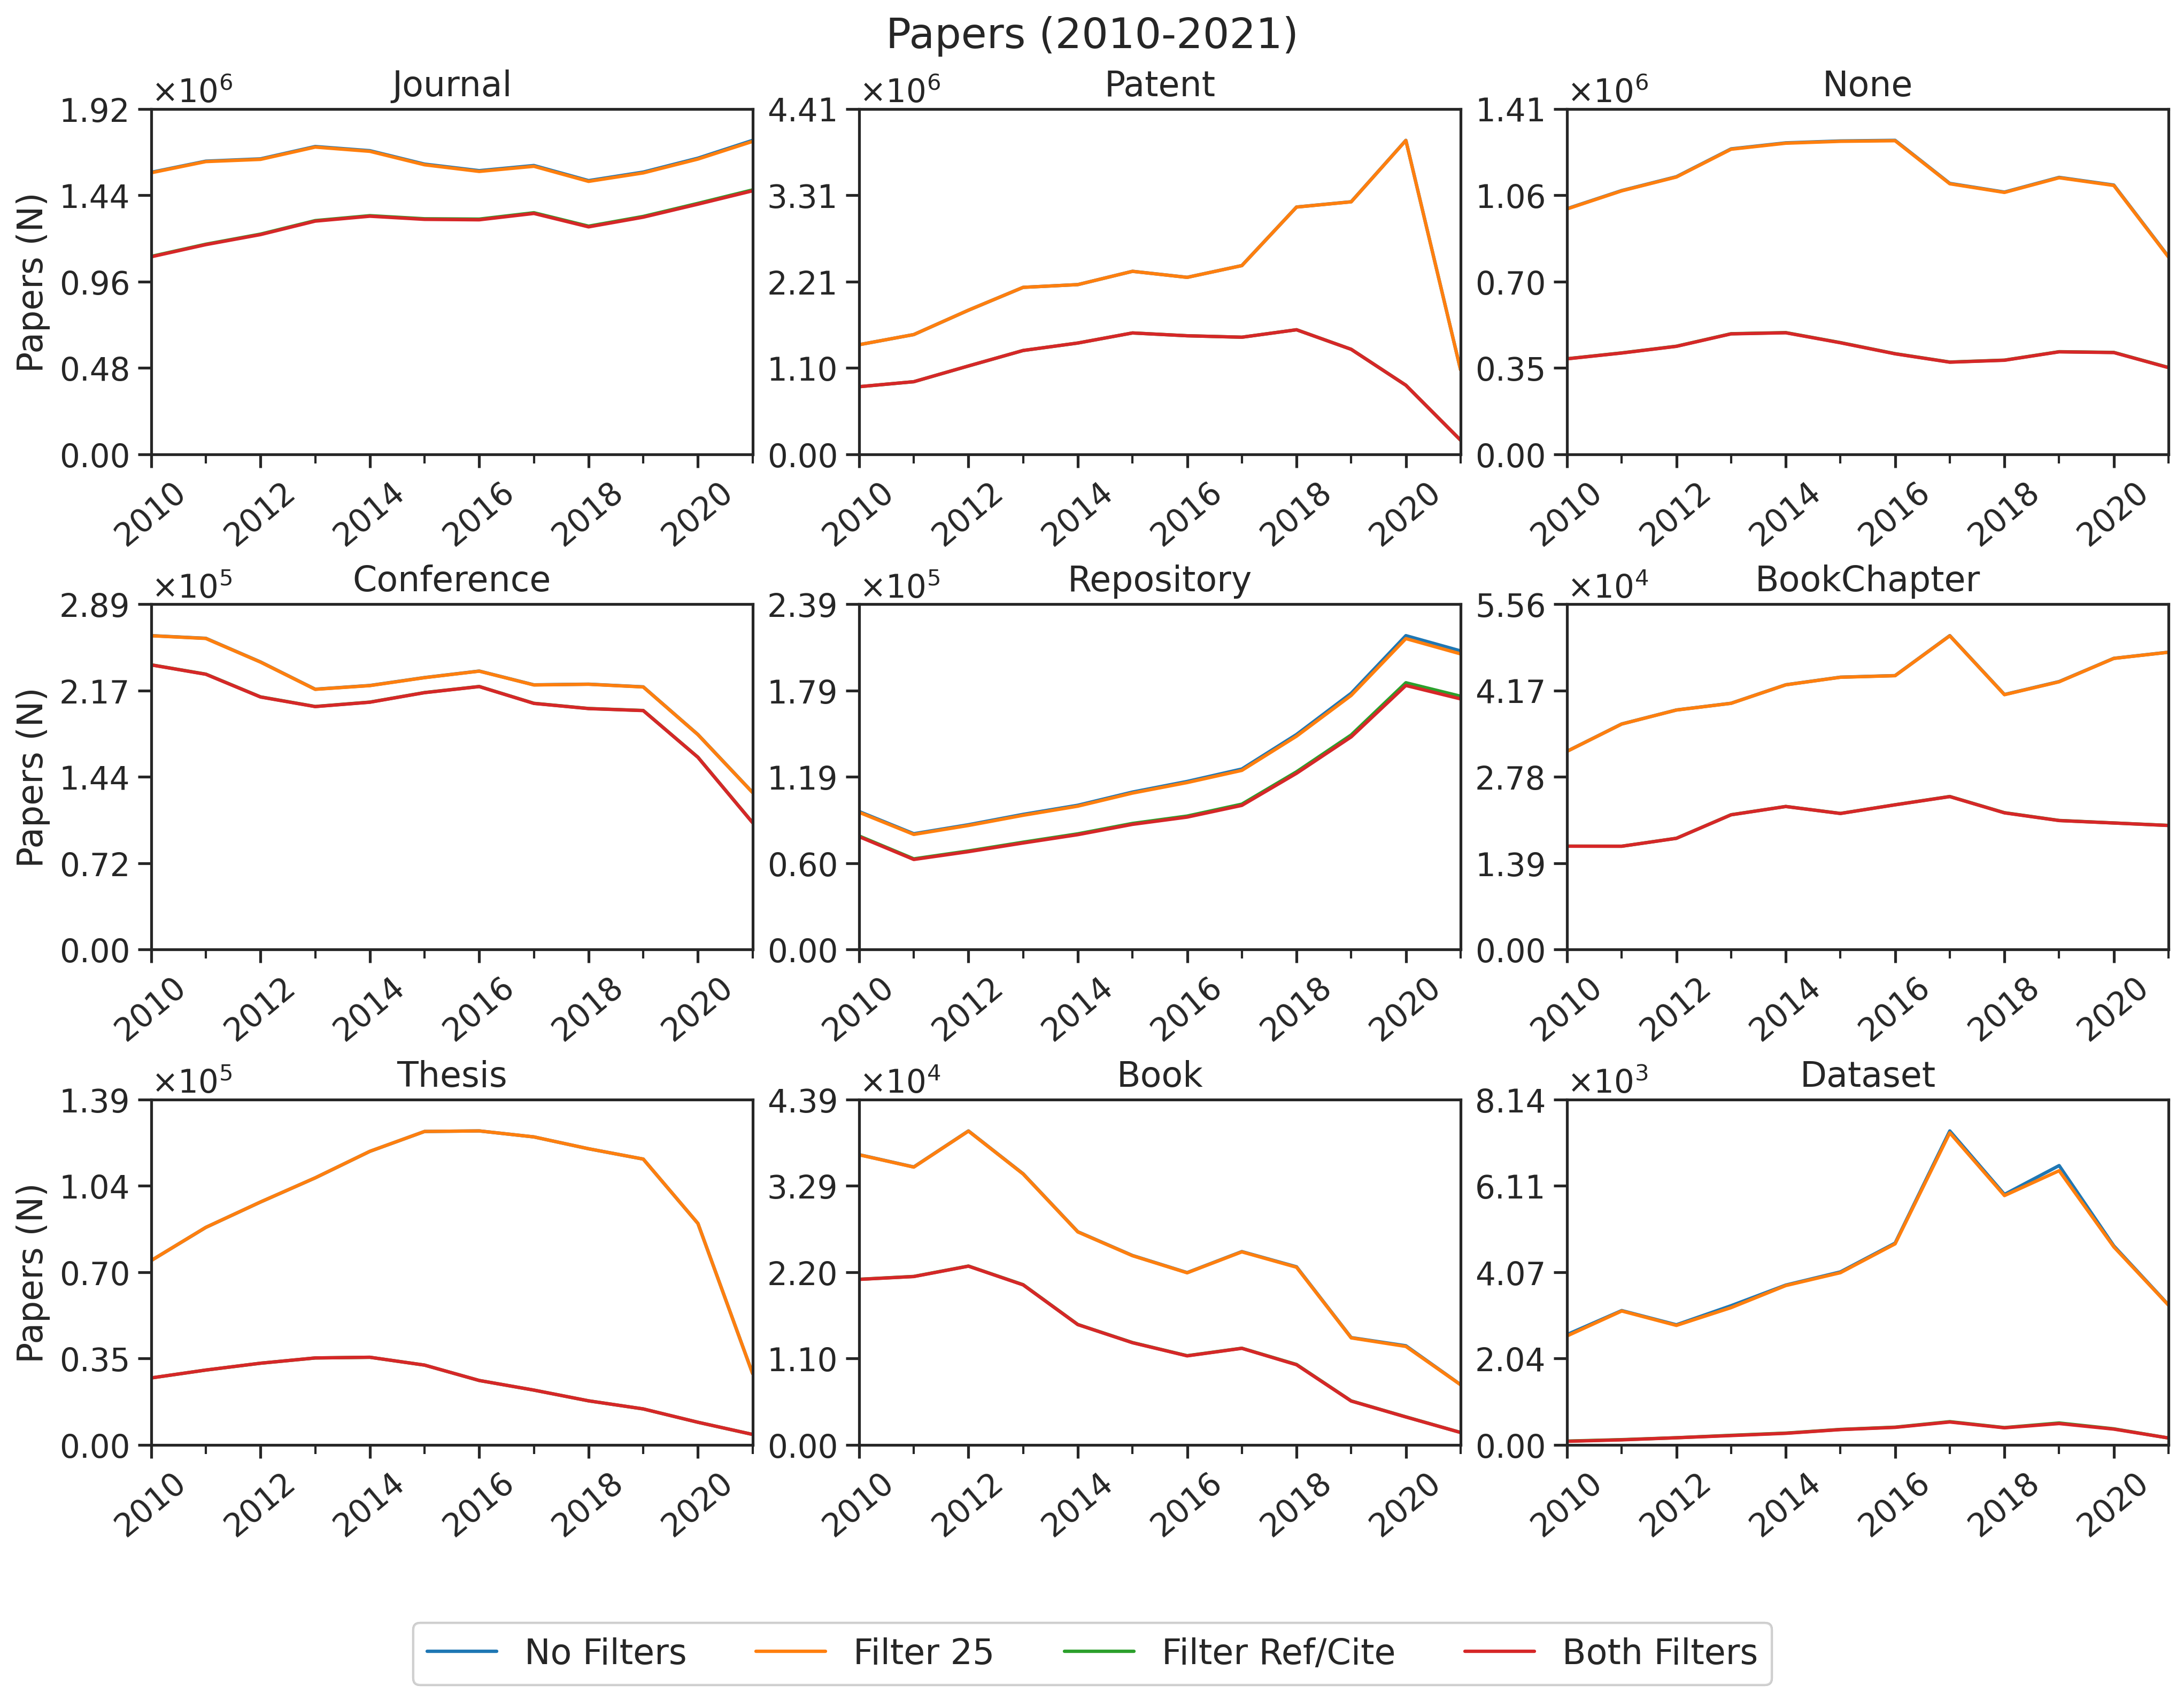

In [63]:
fig, ax = plt.subplots(3, 3, figsize = figsize, dpi=dpi, constrained_layout=True) #, constrained_layout=True)
axe = ax.ravel()
for Filter in ["No Filters", "Filter 25", "Filter Ref/Cite", "Both Filters"]: 
    i = 0
    papers_current = papers_gathered[papers_gathered["Filter"] == Filter]
    for DocType in ["Journal", "Patent", "None", "Conference", 
                    "Repository", "BookChapter", "Thesis", "Book", "Dataset"]: # df_super.DocType.unique():
        df_sub = papers_current[papers_current["DocType"] == DocType]
        df_sub = df_sub.sort_values('Year').reset_index()[['Year', 'DocType', 'count']]
        df_sub.plot('Year', 'count', ax = axe[i], rot=40, color = colors_dct.get(Filter))
        axe[i].set_title(f"{DocType}")
        axe[i].get_legend().remove()
        if i == 0 or i == 3 or i == 6: 
            axe[i].set_ylabel(f'Papers (N)')
        if Filter == "No Filters": 
            axe[i].set_ylim(0, round(df_sub["count"].max() + df_sub["count"].max()/10, 0))
            #axe[i].set_ylim(0, )
        axe[i].set_xlabel('')
        axe[i].yaxis.set_major_locator(plt.LinearLocator(numticks=5))
        yfmt = ScalarFormatterForceFormat()
        yfmt.set_powerlimits((0,0))
        axe[i].yaxis.set_major_formatter(yfmt) #%.2e
        axe[i].ticklabel_format(axis = 'y', useMathText=True)
        i += 1
    lines = [Line2D([0], [0], color=colors_dct.get("No Filters")),
         Line2D([0], [0], color=colors_dct.get("Filter 25")),
         Line2D([0], [0], color=colors_dct.get("Filter Ref/Cite")),
         Line2D([0], [0], color=colors_dct.get("Both Filters"))]
    labels = ["No Filters", "Filter 25", "Filter Ref/Cite", "Both Filters"]
    lgd = fig.legend(lines, labels, prop=font, ncol=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
    #fig.subplots_adjust(bottom=0.1)  
    
ttl = plt.suptitle(f"Papers (2010-2021)")
#plt.show();
plt.savefig(f"{outpath}papers_2010_2021.pdf", bbox_extra_artists=(lgd,ttl), bbox_inches="tight")
#fig.clf()
#plt.close(fig)

## authorships

In [64]:
authorships_NoFilter["Filter"] = "No Filters"
authorships_25["Filter"] = "Filter 25"
authorships_RefCite["Filter"] = "Filter Ref/Cite"
authorships_All["Filter"] = "Both Filters"

In [65]:
authorships_gathered = pd.concat([authorships_NoFilter, authorships_25, authorships_RefCite, authorships_All])

In [66]:
colors_dct = {"No Filters": "tab:blue", "Filter 25": "tab:orange", "Filter Ref/Cite": "tab:green", "Both Filters": "tab:red"}

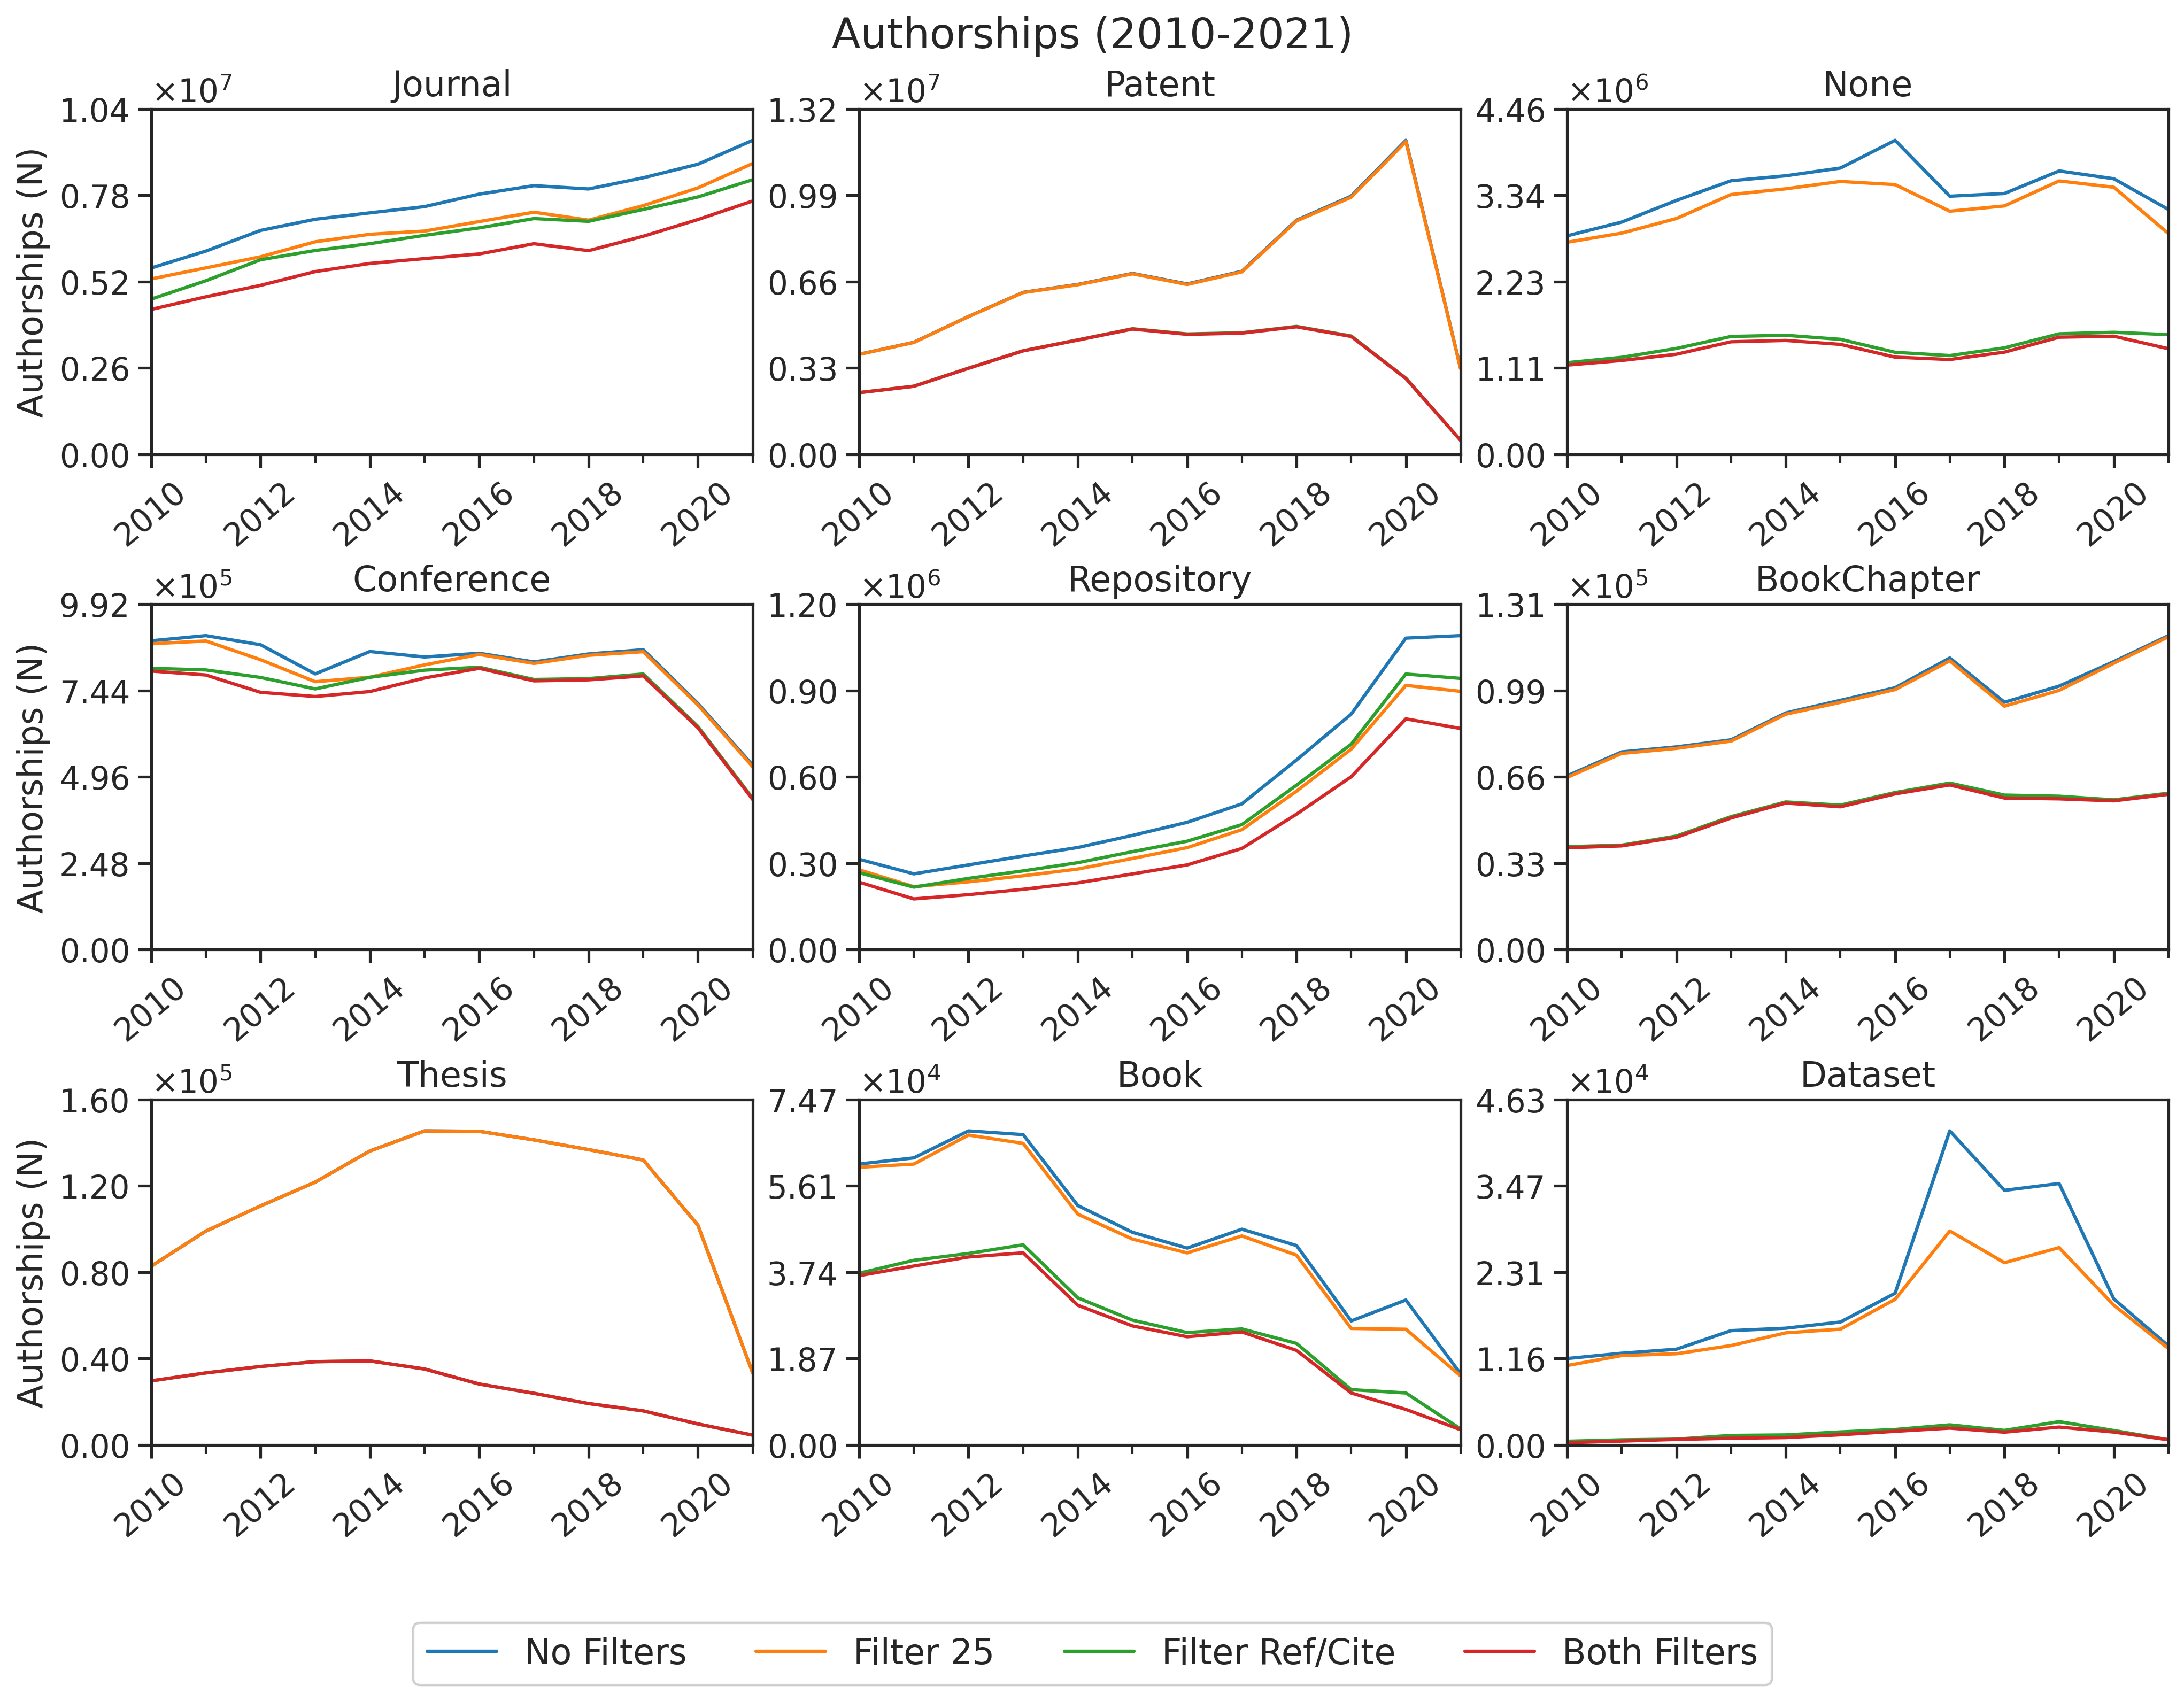

In [67]:
fig, ax = plt.subplots(3, 3, figsize = figsize, dpi=dpi, constrained_layout=True) #, constrained_layout=True)
axe = ax.ravel()
for Filter in ["No Filters", "Filter 25", "Filter Ref/Cite", "Both Filters"]: 
    i = 0
    papers_current = authorships_gathered[authorships_gathered["Filter"] == Filter]
    for DocType in ["Journal", "Patent", "None", "Conference", 
                    "Repository", "BookChapter", "Thesis", "Book", "Dataset"]: # df_super.DocType.unique():
        df_sub = papers_current[papers_current["DocType"] == DocType]
        df_sub = df_sub.sort_values('Year').reset_index()[['Year', 'DocType', 'count']]
        df_sub.plot('Year', 'count', ax = axe[i], rot=40, color = colors_dct.get(Filter))
        axe[i].set_title(f"{DocType}")
        axe[i].get_legend().remove()
        if i == 0 or i == 3 or i == 6: 
            axe[i].set_ylabel(f'Authorships (N)')
        if Filter == "No Filters": 
            axe[i].set_ylim(0, round(df_sub["count"].max() + df_sub["count"].max()/10, 0))
            #axe[i].set_ylim(0, )
        axe[i].set_xlabel('')
        axe[i].yaxis.set_major_locator(plt.LinearLocator(numticks=5))
        yfmt = ScalarFormatterForceFormat()
        yfmt.set_powerlimits((0,0))
        axe[i].yaxis.set_major_formatter(yfmt) #%.2e
        axe[i].ticklabel_format(axis = 'y', useMathText=True)
        i += 1
    lines = [Line2D([0], [0], color=colors_dct.get("No Filters")),
         Line2D([0], [0], color=colors_dct.get("Filter 25")),
         Line2D([0], [0], color=colors_dct.get("Filter Ref/Cite")),
         Line2D([0], [0], color=colors_dct.get("Both Filters"))]
    labels = ["No Filters", "Filter 25", "Filter Ref/Cite", "Both Filters"]
    lgd = fig.legend(lines, labels, prop=font, ncol=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
    #fig.subplots_adjust(bottom=0.1)  
    
ttl = plt.suptitle(f"Authorships (2010-2021)")
#plt.show();
plt.savefig(f"{outpath}authorships_2010_2021.pdf", bbox_extra_artists=(lgd,ttl), bbox_inches="tight")
#fig.clf()
#plt.close(fig)